In [5]:
%matplotlib inline
from modsim import *
from tabula import read_pdf
from pandas import read_html
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

table1 = read_html('USASAC2015-Report#27-2014-Activities 8.html')
product_tables = read_html('USASAC2015-Report#27-2014-Activities 10.html')
#table2= read_html('USASAC2015-Report#27-2014-Activities 97-11.html')
#table3 = read_html('USASAC2015-Report#27-2014-Activities 98-12.html')
#return_97 = table2[0]
#return_98 = table3[0]

In [6]:
aqua_prdt = product_tables[0]
aqua_prdt.columns = ['year','production']
#aqua_prdt.production[15] = 2381
aqua_prdt.index = aqua_prdt.year
#aqua_prdt

In [7]:
salmon_pop = table1[0]
salmon_pop.columns = ['year','fst', 'second','thrid', 'repeat', 'total','hatchery', 'natural']
salmon_pop.index = salmon_pop.year
#salmon_popu = salmon_pop.hatchery + salmon_pop.natural
pop_total = salmon_pop.natural + salmon_pop.hatchery
#salmon_pop.fst

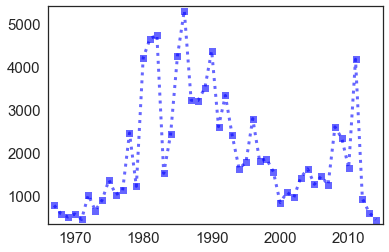

In [8]:
newfig()
plot(salmon_pop.index, salmon_pop.total, 'bs:')


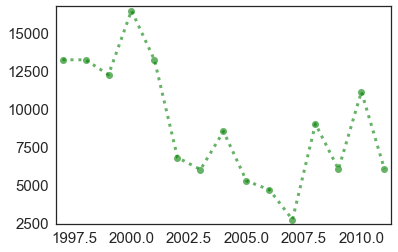

In [10]:
newfig()
plot(aqua_prdt.index, aqua_prdt.production, 'go:')

In [25]:
a = np.random.rand(1, 5)

In [26]:
for i in a:
    print(i*100)

[ 36.7110373   93.20343506  43.64162352  82.9520051   33.94238084]


In [27]:
b = 10000 + np.random.randn(5) * 2500
np.mean(b)

9786.1502036671245

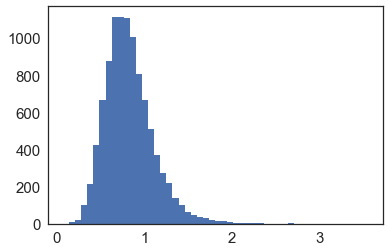

In [28]:
mu, sigma = 10000, 2500
x = mu + sigma*np.random.randn(10000)
x = 10 - log(x)
n, bins, patches = plt.hist(x, bins = 50)
plt.show()
#salmon_pop.first

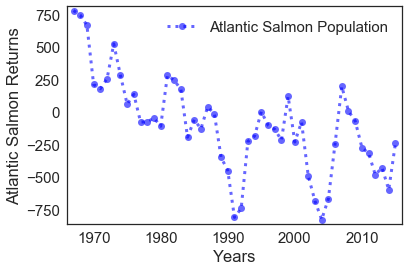

In [43]:
salmon = System(t0 = salmon_pop.index[0],
                t_end = salmon_pop.index[-1],
                p0 = salmon_pop.total[salmon_pop.index[0]],
                fishing = 3000)

def run_simulation1(system):
    system.returns = TimeSeries()
    system.returns[system.t0] = system.p0
    mu, sigma = 300, 200
    for year in linrange(system.t0, system.t_end):
        birth = mu + sigma*np.random.randn(1, 1)
        system.fishing = 2900 + 1000*np.random.randn(1, 1)
        system.returns[year+1] = system.returns[year] + birth - system.fishing/10
    return system.returns

def decoration():
    decorate(title = '',
             xlabel = 'Years',
             ylabel = 'Atlantic Salmon Returns',
             legend = True)
    
results = run_simulation1(salmon)
plot(results, 'bo:', label = 'Atlantic Salmon Population')
decoration()

In [44]:
mu + sigma*np.random.randn(1, 1)

array([[ 10000.32546935]])

In [45]:
def run_simulation2(system):
    system.returns = TimeSeries()
    system.returns[system.t0] = system.p0
    mu1, sigma1, mu2, sigma2 = 300, 200, 290, 100
    system.fishing
    return system.returns

